In [1]:
!pip install openpyxl


# **Ransome analysis using ML and DL**

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses
import numpy as np
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# **Data grabbing**

In [3]:
lab=LabelEncoder()
import pandas as pd
data=pd.read_csv('/kaggle/input/ugransome-dataset/final(2).csv')
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non

# **grabbing the Object column**

In [4]:
new=[]
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts().values) < 10:
        new.append(i)

# **Type conversion and its analysis**

In [5]:
lab=LabelEncoder()
for i in data[new]:
    data[i]=lab.fit_transform(data[i])

print(data.info())


print(data['Family'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  int64 
 2   Flag           149043 non-null  int64 
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  int64 
 6   ExpAddress     149043 non-null  int64 
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  int64 
 11  Threats        149043 non-null  int64 
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 15.9+ MB
None
Family
Locky               25062
SamSam              19657
WannaCry            16110
JigSaw              13712
Flyper           

# **Outlier detection and deduction**

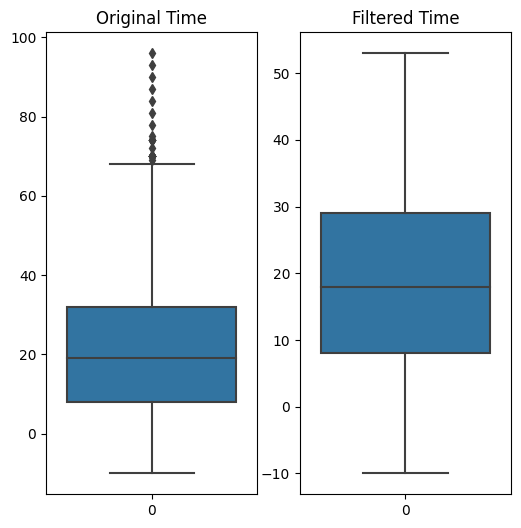

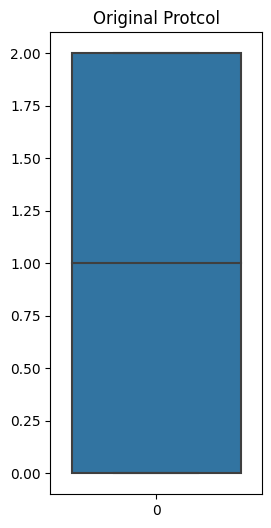

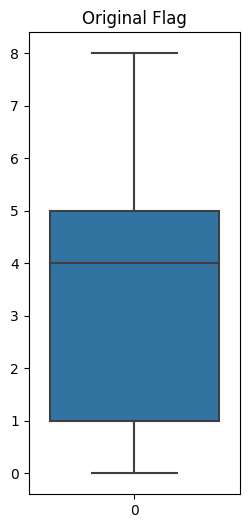

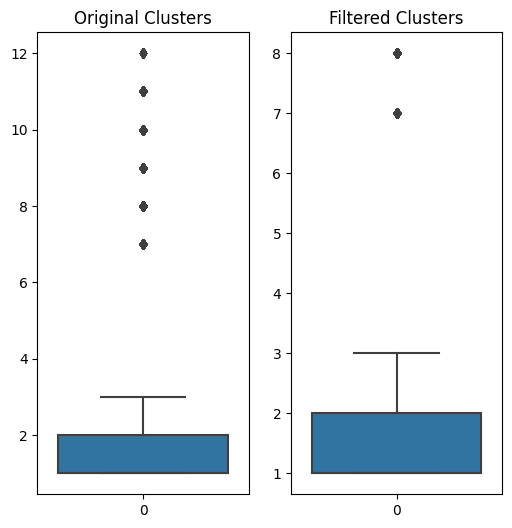

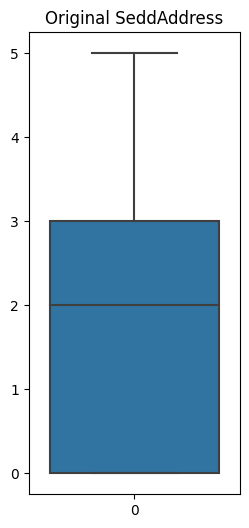

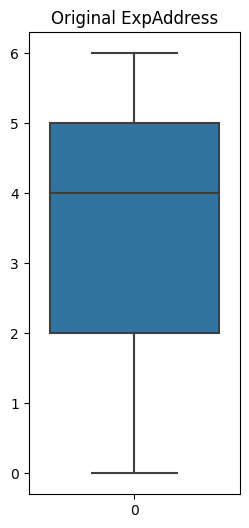

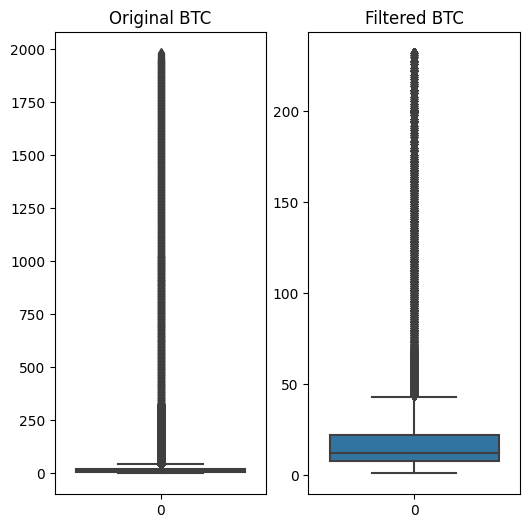

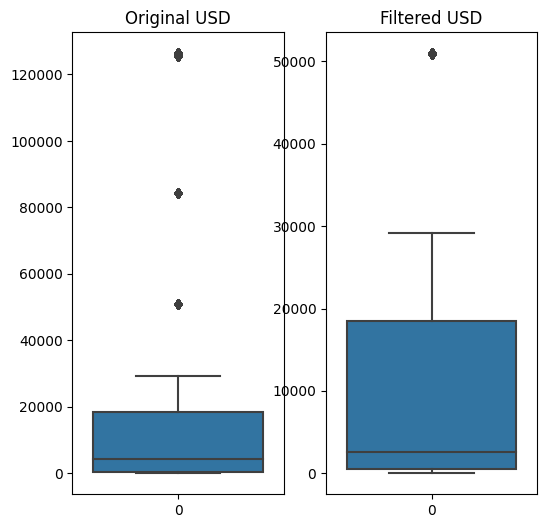

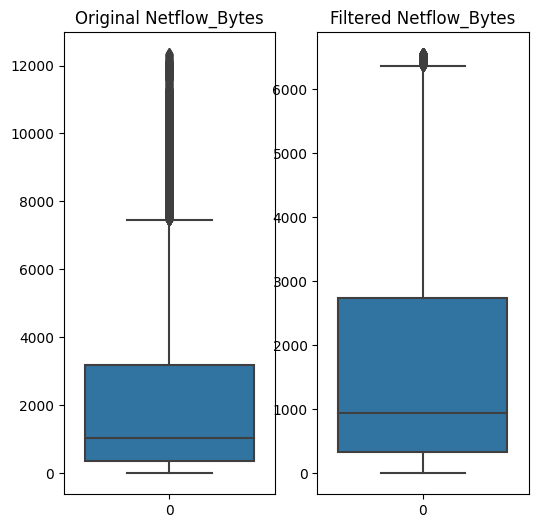

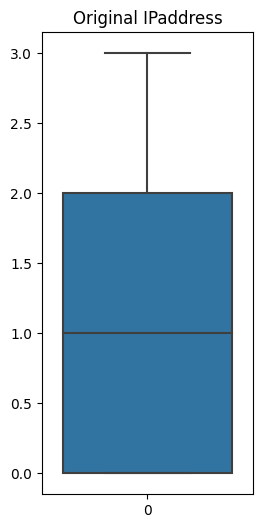

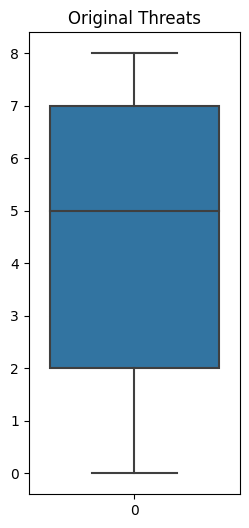

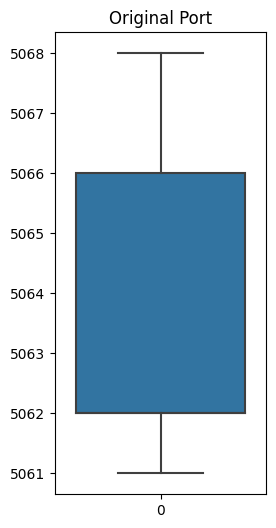

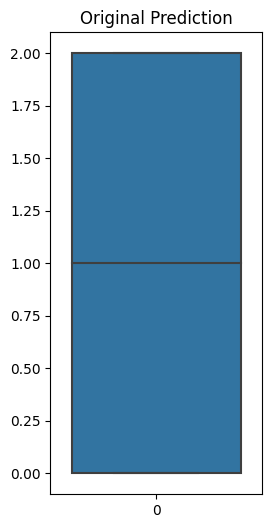

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           149043 non-null  int64  
 1   Protcol        149043 non-null  int64  
 2   Flag           149043 non-null  int64  
 3   Family         149043 non-null  object 
 4   Clusters       149043 non-null  int64  
 5   SeddAddress    149043 non-null  int64  
 6   ExpAddress     149043 non-null  int64  
 7   BTC            149043 non-null  int64  
 8   USD            149043 non-null  int64  
 9   Netflow_Bytes  149043 non-null  int64  
 10  IPaddress      149043 non-null  int64  
 11  Threats        149043 non-null  int64  
 12  Port           149043 non-null  int64  
 13  Prediction     149043 non-null  int64  
 14  z-scores       149043 non-null  float64
dtypes: float64(1), int64(13), object(1)
memory usage: 17.1+ MB
None
Original Data Length: 149043
Filter

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# data = pd.read_csv('your_data.csv')

# Generate initial boxplots for all numerical columns
num_columns = data.select_dtypes(include='number').columns.values

for col in num_columns:
    plt.figure(figsize=(6, 6))
    
    # Original data
    plt.subplot(1, 2, 1)
    sns.boxplot(data[col])
    plt.title(f'Original {col}')
    
    # Calculate z-scores and remove outliers
    data['z-scores'] = (data[col] - data[col].mean()) / data[col].std()
    outlier = np.abs(data['z-scores'] > 3).sum()
    
    if outlier > 0:
        threshold = 2
        upper = data[col].mean() + threshold * data[col].std()
        lower = data[col].mean() - threshold * data[col].std()
        filtered_data = data[(data[col] > lower) & (data[col] < upper)]
        
        # Filtered data
        plt.subplot(1, 2, 2)
        sns.boxplot(filtered_data[col])
        plt.title(f'Filtered {col}')
    
    plt.show()

# Print data info before and after outlier removal
print("Original Data Info:")
print(data.info())

print("Original Data Length:", len(data))

# Remove outliers from the entire dataset based on the info dictionary
threshold = 2
for col in num_columns:
    upper = data[col].mean() + threshold * data[col].std()
    lower = data[col].mean() - threshold * data[col].std()
    data = data[(data[col] > lower) & (data[col] < upper)]

print("Filtered Data Length:", len(data))

print("Filtered Data Info:")
print(data.info())

# **Data transformation and finding the optimal correlation**

In [7]:
data['Family']=lab.fit_transform(data['Family'])


values={}
for i in data.columns.values:
    cnt=0
    corri=data.corr()[i]
    corri=corri.drop(['z-scores',i])
    for j in corri.index:
        if corri[j] <0:
            cnt +=1

    values[i]=cnt

print(values)


{'Time': 9, 'Protcol': 9, 'Flag': 6, 'Family': 9, 'Clusters': 10, 'SeddAddress': 8, 'ExpAddress': 6, 'BTC': 10, 'USD': 8, 'Netflow_Bytes': 6, 'IPaddress': 5, 'Threats': 10, 'Port': 7, 'Prediction': 9, 'z-scores': 9}


# **Correlation analysis**

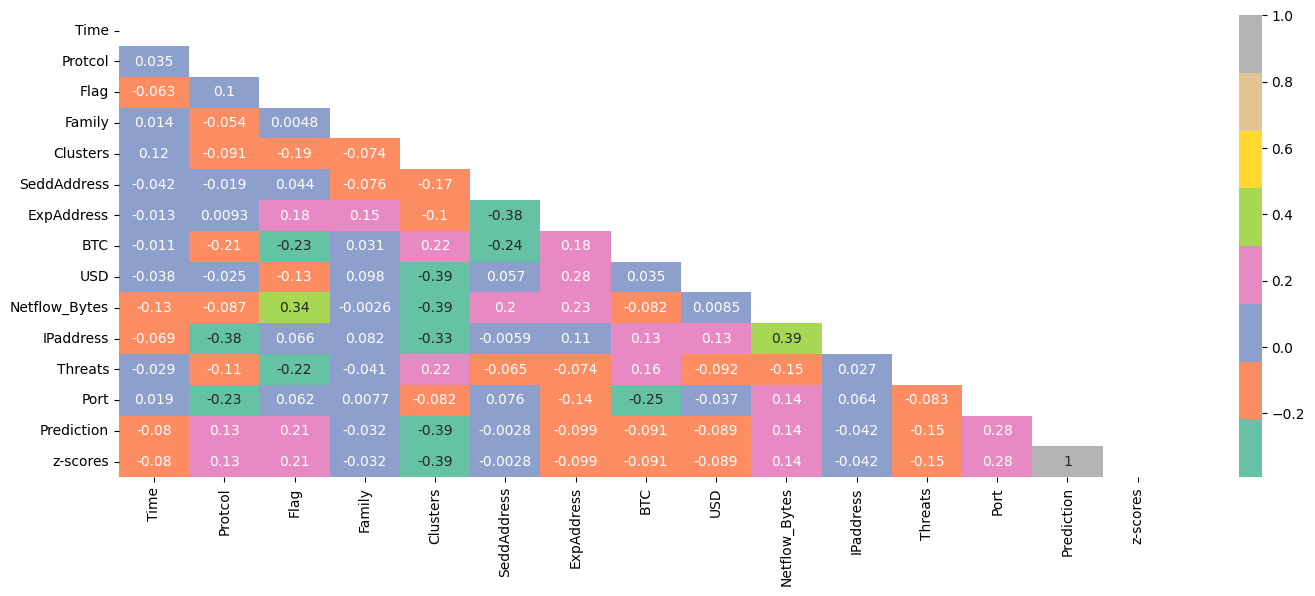

In [8]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()


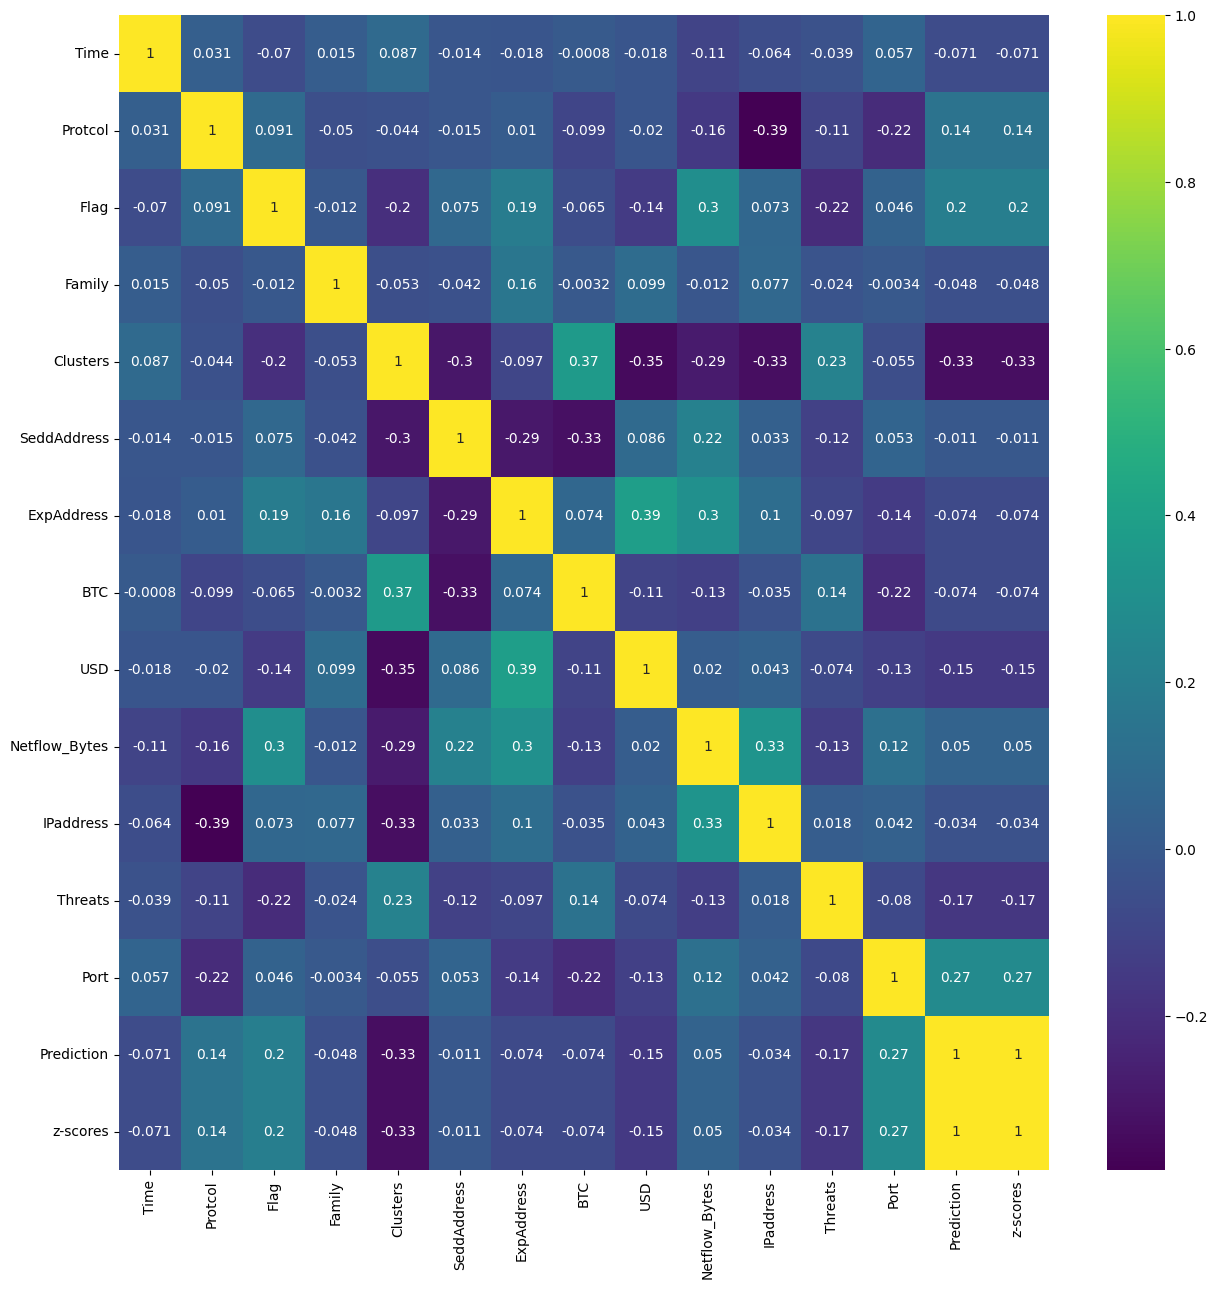

In [9]:
plt.figure(figsize=(15, 15))

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

# **Analysis using Machine Learning for optimal correlated column**

In [10]:
!pip install lazypredict

  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata


In [11]:
y = data["Prediction"]
X = data.iloc[:,:-2]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42,shuffle=True, stratify=y)

In [13]:
from lazypredict.Supervised import LazyClassifier ,CLASSIFIERS
clf = LazyClassifier(verbose=1,predictions=True,classifiers=CLASSIFIERS[:11]+CLASSIFIERS[15:] ,custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  4%|▍         | 1/25 [00:03<01:32,  3.83s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8609712607509964, 'Balanced Accuracy': 0.8454506150580406, 'ROC AUC': None, 'F1 Score': 0.8602385288249913, 'Time taken': 3.8338897228240967}


  8%|▊         | 2/25 [00:05<01:02,  2.71s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9945458359555276, 'Balanced Accuracy': 0.9942272142594382, 'ROC AUC': None, 'F1 Score': 0.994546634816146, 'Time taken': 1.9139118194580078}


 12%|█▏        | 3/25 [00:06<00:35,  1.59s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.7831445353471785, 'Balanced Accuracy': 0.7619491922224143, 'ROC AUC': None, 'F1 Score': 0.7809460429783484, 'Time taken': 0.2663428783416748}


 16%|█▌        | 4/25 [03:00<24:23, 69.69s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8069540591567024, 'Balanced Accuracy': 0.7749831270780652, 'ROC AUC': None, 'F1 Score': 0.7979358716584285, 'Time taken': 174.0813274383545}


 32%|███▏      | 8/25 [03:00<05:18, 18.73s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9943360604153556, 'Balanced Accuracy': 0.9940292367164397, 'ROC AUC': None, 'F1 Score': 0.9943369970709728, 'Time taken': 0.2981851100921631}
{'Model': 'DummyClassifier', 'Accuracy': 0.3935389133627019, 'Balanced Accuracy': 0.3333333333333333, 'ROC AUC': None, 'F1 Score': 0.22227276876966096, 'Time taken': 0.05942797660827637}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9851059366477869, 'Balanced Accuracy': 0.9840482212762148, 'ROC AUC': None, 'F1 Score': 0.9851170192670676, 'Time taken': 0.11552977561950684}


 36%|███▌      | 9/25 [03:06<04:10, 15.68s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9928151877491085, 'Balanced Accuracy': 0.9921886015526674, 'ROC AUC': None, 'F1 Score': 0.9928134213166708, 'Time taken': 5.773940801620483}
{'Model': 'GaussianNB', 'Accuracy': 0.7931613173903923, 'Balanced Accuracy': 0.7649801489277334, 'ROC AUC': None, 'F1 Score': 0.7868007429588213, 'Time taken': 0.09057950973510742}


 44%|████▍     | 11/25 [03:09<02:19,  9.94s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9775540172015943, 'Balanced Accuracy': 0.9757855412453441, 'ROC AUC': None, 'F1 Score': 0.9775406155961698, 'Time taken': 2.7203221321105957}


 52%|█████▏    | 13/25 [03:10<01:13,  6.13s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7952066289070694, 'Balanced Accuracy': 0.7651570159502431, 'ROC AUC': None, 'F1 Score': 0.7881137918189886, 'Time taken': 1.3069636821746826}
{'Model': 'NearestCentroid', 'Accuracy': 0.7525173064820642, 'Balanced Accuracy': 0.7403421595208802, 'ROC AUC': None, 'F1 Score': 0.757589331782407, 'Time taken': 0.18816375732421875}


 56%|█████▌    | 14/25 [12:22<26:47, 146.12s/it]

{'Model': 'NuSVC', 'Accuracy': 0.8908118313404657, 'Balanced Accuracy': 0.8736382339426805, 'ROC AUC': None, 'F1 Score': 0.8883731238366523, 'Time taken': 551.5534229278564}


 60%|██████    | 15/25 [12:22<17:50, 107.04s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.723358506398154, 'Balanced Accuracy': 0.6733075303959941, 'ROC AUC': None, 'F1 Score': 0.6960714901794358, 'Time taken': 0.43294239044189453}


 64%|██████▍   | 16/25 [12:23<11:37, 77.52s/it] 

{'Model': 'Perceptron', 'Accuracy': 0.7054226977134466, 'Balanced Accuracy': 0.6680135168325702, 'ROC AUC': None, 'F1 Score': 0.6908545054744837, 'Time taken': 0.4898056983947754}


 68%|██████▊   | 17/25 [12:23<07:25, 55.63s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8729809104258444, 'Balanced Accuracy': 0.8562335789778063, 'ROC AUC': None, 'F1 Score': 0.8706159237180593, 'Time taken': 0.34699392318725586}


 72%|███████▏  | 18/25 [12:30<04:50, 41.57s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9940738409901405, 'Balanced Accuracy': 0.9937163226800373, 'ROC AUC': None, 'F1 Score': 0.9940737788197044, 'Time taken': 6.825852394104004}


 76%|███████▌  | 19/25 [12:30<02:57, 29.51s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.8062722886511433, 'Balanced Accuracy': 0.77282992062608, 'ROC AUC': None, 'F1 Score': 0.7960186045922734, 'Time taken': 0.22818684577941895}


 80%|████████  | 20/25 [12:31<01:44, 20.99s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8062722886511433, 'Balanced Accuracy': 0.77282992062608, 'ROC AUC': None, 'F1 Score': 0.7960186045922734, 'Time taken': 0.5342352390289307}


 84%|████████▍ | 21/25 [12:32<01:00, 15.15s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.815607300188798, 'Balanced Accuracy': 0.7855184419903652, 'ROC AUC': None, 'F1 Score': 0.8077026440839494, 'Time taken': 1.264545202255249}


 88%|████████▊ | 22/25 [13:17<01:12, 24.02s/it]

{'Model': 'SVC', 'Accuracy': 0.9653870358716173, 'Balanced Accuracy': 0.9619341799874744, 'ROC AUC': None, 'F1 Score': 0.965239674845637, 'Time taken': 44.98856592178345}


 96%|█████████▌| 24/25 [13:22<00:14, 14.24s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9949129431508286, 'Balanced Accuracy': 0.9946086752730982, 'ROC AUC': None, 'F1 Score': 0.9949140936449361, 'Time taken': 5.447606325149536}


100%|██████████| 25/25 [13:27<00:00, 32.29s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9951227186910007, 'Balanced Accuracy': 0.9947959904381465, 'ROC AUC': None, 'F1 Score': 0.9951229885629586, 'Time taken': 4.21988582611084}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,0.99,None,1.00,4.22
XGBClassifier,0.99,0.99,None,0.99,5.45
BaggingClassifier,0.99,0.99,None,0.99,1.91
DecisionTreeClassifier,0.99,0.99,None,0.99,0.30
RandomForestClassifier,0.99,0.99,None,0.99,6.83
ExtraTreesClassifier,0.99,0.99,None,0.99,5.77
ExtraTreeClassifier,0.99,0.98,None,0.99,0.12
KNeighborsClassifier,0.98,0.98,None,0.98,2.72
SVC,0.97,0.96,None,0.97,44.99


In [14]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4794
           1       0.90      0.90      0.90      7504
           2       0.90      0.92      0.91      6770

    accuracy                           0.86     19068
   macro avg       0.85      0.85      0.85     19068
weighted avg       0.86      0.86      0.86     19068
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4794
           1       0.99      0.99      0.99      7504
           2       1.00      1.00      1.00      6770

    accuracy                           0.99     19068
   macro avg       0.99      0.99      0.99     19068
weighted avg       0.99      0.99      0.99     19068
 

		 BernoulliNB 

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      4794
           1       0.82      0.84      0.83      7504
       

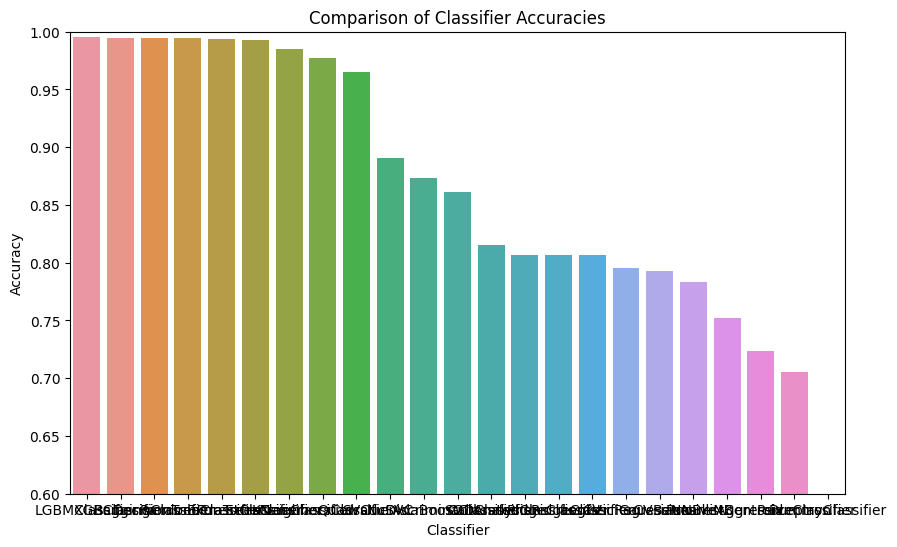

In [15]:
accuracies = [models['Accuracy'], models['Balanced Accuracy'],models['F1 Score']]
classifiers =[i[0]  for i in CLASSIFIERS[:11]+CLASSIFIERS[15:] ] 
s=pd.DataFrame({"names":dict(accuracies[0]).keys(),"values":dict(accuracies[0]).values()})
plt.figure(figsize=(10, 6))
sns.barplot(data=s,x="names",y="values")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0.6, 1.0) 
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
import seaborn as sns

Accuracy: 99.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4794
           1       0.99      0.99      0.99      7504
           2       1.00      1.00      1.00      6770

    accuracy                           0.99     19068
   macro avg       0.99      0.99      0.99     19068
weighted avg       0.99      0.99      0.99     19068

Confusion Matrix:


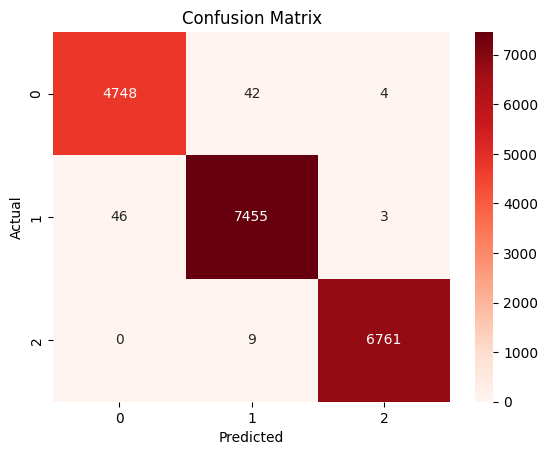

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

base_estimator = DecisionTreeClassifier()

# Initialize the BaggingClassifier with the base estimator
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Reds", annot=True, fmt='d', xticklabels=set(data['Prediction'].unique()), yticklabels=set(data['Prediction'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# save the model
import joblib
joblib.dump(models, f'BaggingClassifier.joblib')

['BaggingClassifier.joblib']